<a href="https://colab.research.google.com/github/ansonsibi1/Credit-Card-Default-Prediction---Capstone-Project/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **Business Objective:**


* **Objective of our project is to predict which customer might default in upcoming months. Before going any further let's have a quick look on defination of what actually meant by Credit Card Default.** 


* **We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.**




* **Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.**

* **So now we know what a credit card is. Now let's see one of problems faced by companies who provide credit cards. Yes it is the peolpe who do not clear off the credit card debt aka credit card defaulters**.

* ***The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.***
 

# **Loading Dataset and Importing Modules**

In [ ]:
# importing modules
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



##Mount the drive and import the dataset

In [ ]:
# mounting the google drive for import the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load Taiwan customers default payments dataset
credit_df=pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Capstone Project 3/default of credit card clients.csv',skiprows=1)

#**Data Exploration**

##**Summary of data**

In [ ]:
# Viewing the data of top 5 rows to take a glimps of the data
credit_df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# View the data of bottom 5 rows to take a glimps of the data
credit_df.tail(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
#Getting the shape of dataset with rows and columns
print(credit_df.shape)

(30000, 25)


In [ ]:
# Identifying all the features of dataset.
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
#Information of the whole dataset
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
# Summary statistics of the given dataset.
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
#getting number of the unique values in each feature.
credit_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

#**Data Preprocessing**

###**Null Values**

In [ ]:
#check for count of missing values in each column.
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

###**Duplicate values**

**Why is it important to remove duplicate records from my data?** 
* ***"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.***

In [ ]:
# Checking Duplicate Values
value=len(credit_df[credit_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [ ]:
#Renaming the Target variable.
credit_df= credit_df.rename(columns={'default payment next month': 'def payment'})


In [ ]:
#Renaming the below mentioned columns .
credit_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
credit_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
credit_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
# Reindexing the columns based on the order of month.
credit_df= (credit_df.reindex(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_APR','PAY_MAY', 'PAY_JUN', 'PAY_JUL','PAY_AUG', 'PAY_SEPT',
      'BILL_AMT_APR', 'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL','BILL_AMT_AUG', 'BILL_AMT_SEPT',
        'PAY_AMT_APR', 'PAY_AMT_MAY','PAY_AMT_JUN',  'PAY_AMT_JUL', 'PAY_AMT_AUG','PAY_AMT_SEPT',
        'def payment'], axis=1)
          .dropna(how='all', axis=1))

#**Exploratory Data Analysis**

In [ ]:
#plotting the count plot to vizualize the data distribution
credit_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

##**Univariate Analysis**

### **Analysis of Dependent Variable:**

In [ ]:
# counts the dependent variable data set
credit_df['def payment'].value_counts()

0    23364
1     6636
Name: def payment, dtype: int64

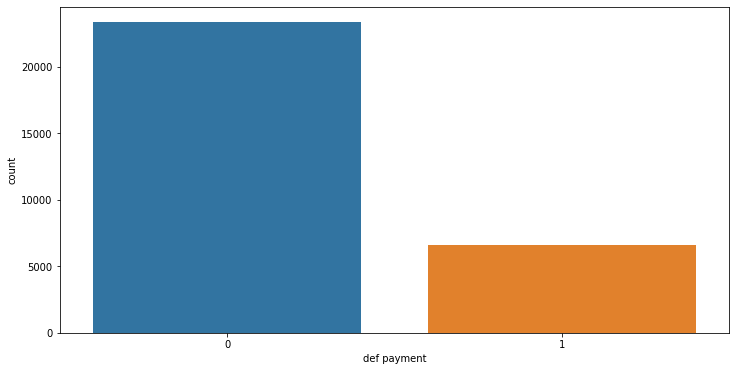

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(credit_df['def payment'])

##**Categorical Feautures**





###**SEX**

In [ ]:
#Finding the value counts for unique values in SEX

credit_df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

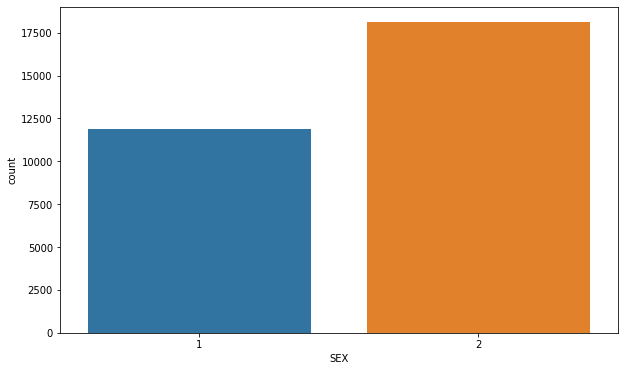

In [ ]:
#plotting the count plot of SEX to vizualize the data distribution

plt.figure(figsize=(10,6))
sns.countplot(credit_df['SEX'])

###**MARRIAGE**

In [ ]:
#Finding the value counts for unique values in MARRIAGE
credit_df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

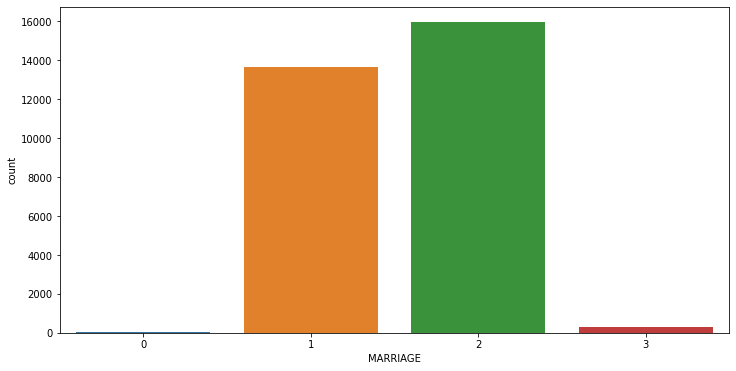

In [ ]:
#plotting the count plot of MARRIAGE to vizualize the data distribution
plt.figure(figsize=(12,6))
sns.countplot(credit_df['MARRIAGE'])

###**EDUCATION**

In [ ]:
#Finding the value counts for unique values in education
credit_df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

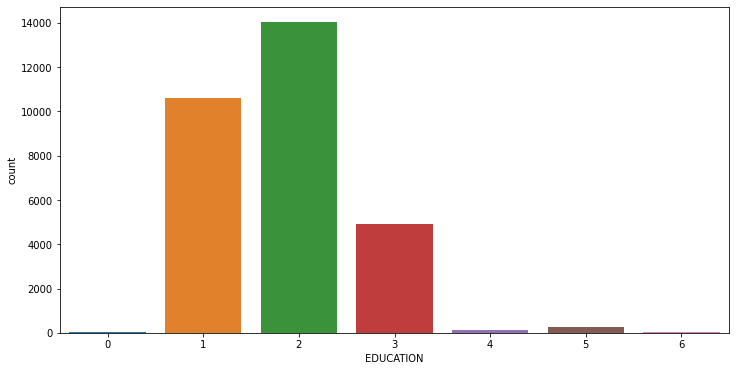

In [ ]:
#plotting the count plot of Education to vizualize the data distribution
plt.figure(figsize=(12,6))
sns.countplot(credit_df['EDUCATION'])

There are few people on the 'unknown' categories (0, 5, 6) and, although their probabilities of default are not exactly close, all of them are lower than the probabilities found for the 'well defined' labels (1, 2 and 3). I'll be making the choice of putting them together with the same value.

###**HISTORY OF PAST PAYMENT**

In [ ]:
#Creating a new dataframe for history of past payments.
Past_pay=credit_df[[ 'PAY_APR','PAY_MAY', 'PAY_JUN', 'PAY_JUL','PAY_AUG', 'PAY_SEPT']]


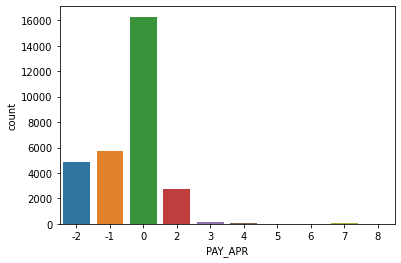

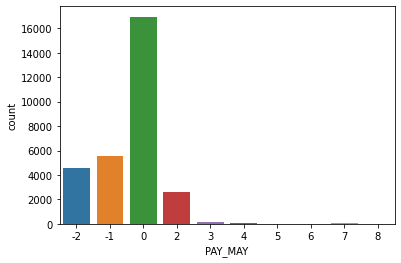

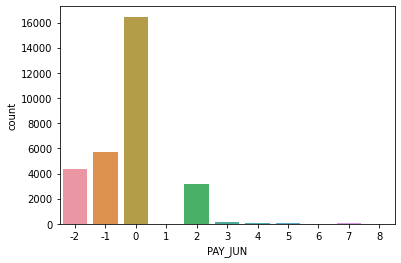

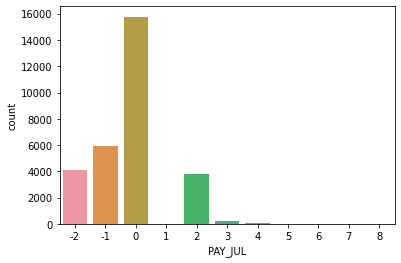

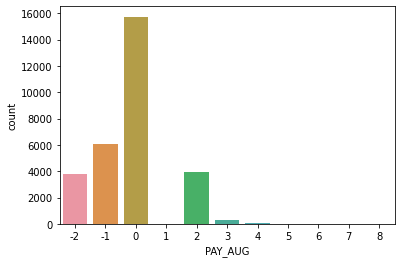

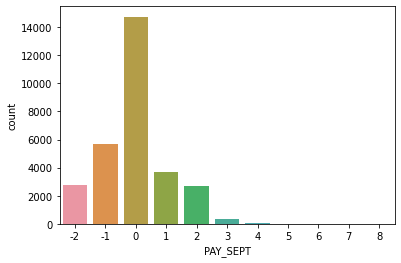

In [ ]:
#plotting the count plot  to vizualize the data distribution of history of past payment.
for i, col in enumerate(Past_pay.columns):
    plt.figure(i)
    sns.countplot(x=col, data=Past_pay)

##**Numerical Feautures**

###**AGE**

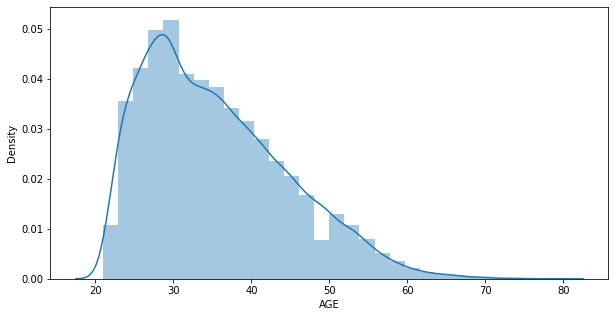

In [ ]:
#Plotting how the distribution of AGE looks like.
plt.figure(figsize=(10,5))
sns.distplot(credit_df['AGE'],kde=True,bins=30);

Most people in our dataset have between 25 and 40 years old. There is also an impression that around that age the chance of default is a little lower, but we could divide our dataset in bins and check the percentage of default in each age group to be sure.

###**Cedit Amount**

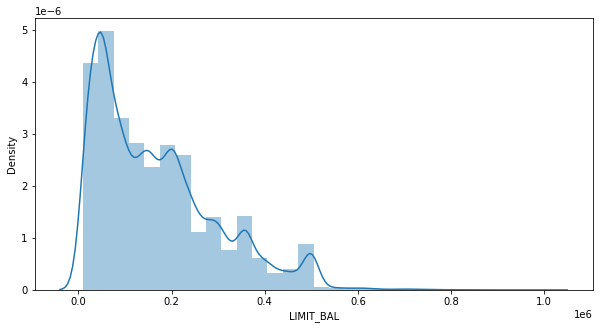

In [ ]:
#Plotting to know how the distribution of LIMIT_BAL looks like.

plt.figure(figsize=(10,5))
sns.distplot(credit_df['LIMIT_BAL'],kde=True,bins=30);

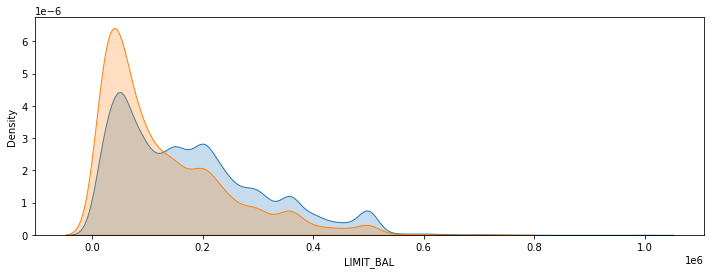

In [ ]:
plt.figure(figsize=(12,4))

sns.kdeplot(credit_df.loc[(credit_df['def payment'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
sns.kdeplot(credit_df.loc[(credit_df['def payment'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)

Most customers have 200k or less of credit limit. And it seems that we will find a higher concentration of customers in default on that range.

###**Paid Amount**

In [ ]:
#assign the Paid Amount variable to a single variable 
pay_amnt_df = credit_df[['PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN',
       'PAY_AMT_JUL', 'PAY_AMT_AUG', 'PAY_AMT_SEPT', 'def payment']]

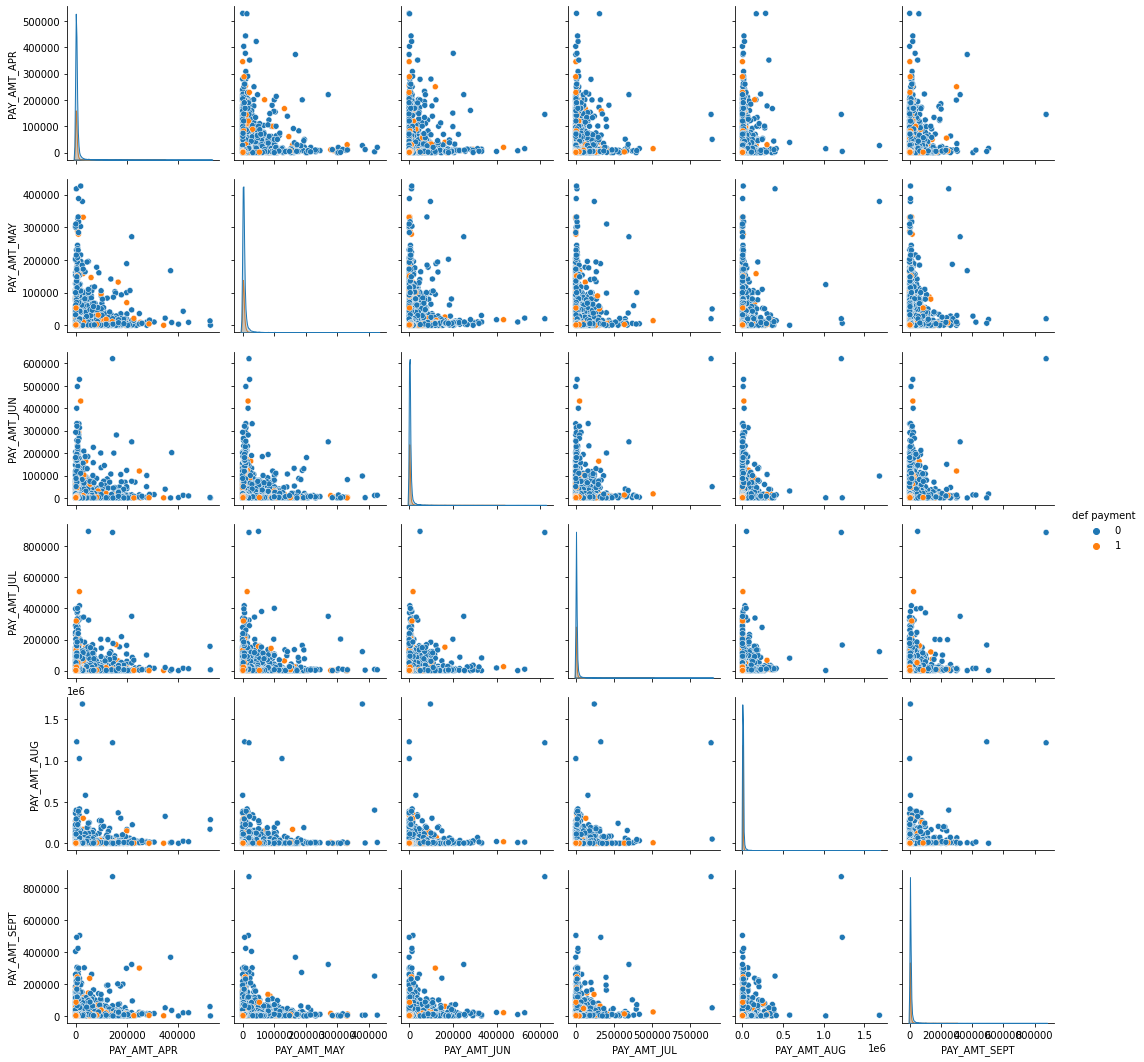

In [ ]:
#plotting the pair plot for paid amount
sns.pairplot(data = pay_amnt_df, hue='def payment')

In [ ]:
credit_df.shape

(30000, 25)

##**Bivariate Analysis**

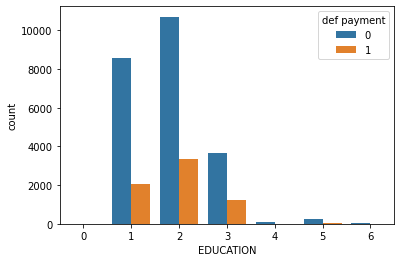

In [ ]:
#plotting  data distribution related to the default_payment_next_month with respect to Education
ax=sns.countplot(x='EDUCATION', hue='def payment', data=credit_df)
plt.show()

The predominant level of education in our dataset is (1 = graduate school; 2 = university; 3 = high school; 4 = others ;and (0,5,6)=Unknown)

Considering only the first three levels, it seems that a higher education translates to a lower chance of default. However, both 'Unknown' and 'Others' (which we would presume that it means a lower level than high school), have a noticeably lower probability

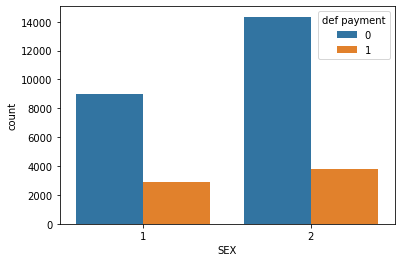

In [ ]:
#plotting data distribution related to the default_payment_next_month with respect to SEX
ax=sns.countplot(x='SEX', hue='def payment', data=credit_df)
plt.show()

There are more women than men in our dataset and, apparently, men have a slightly higher chance of default. We will try to confirm it a little later by comparing men and women with the same education and marital status.

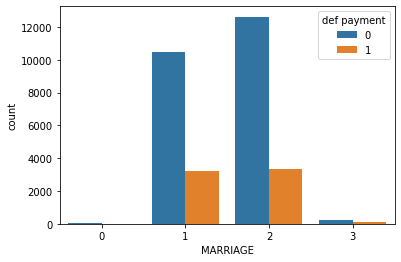

In [ ]:
#plotting  data distribution related to the default_payment_next_month with respect to MARRIAGE
marri = sns.countplot(x="MARRIAGE", hue='def payment', data=credit_df )

plt.show()

* ***High defaulter rate when it comes to others***

Text(0, 0.5, '% of Default')

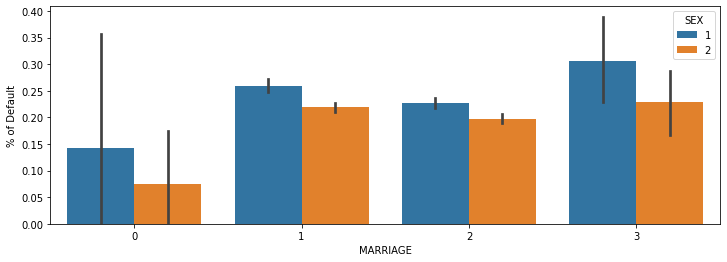

In [ ]:

plt.figure(figsize=(12,4))

sns.barplot(x = "MARRIAGE", y = "def payment", hue = "SEX", data = credit_df)

plt.ylabel("% of Default")



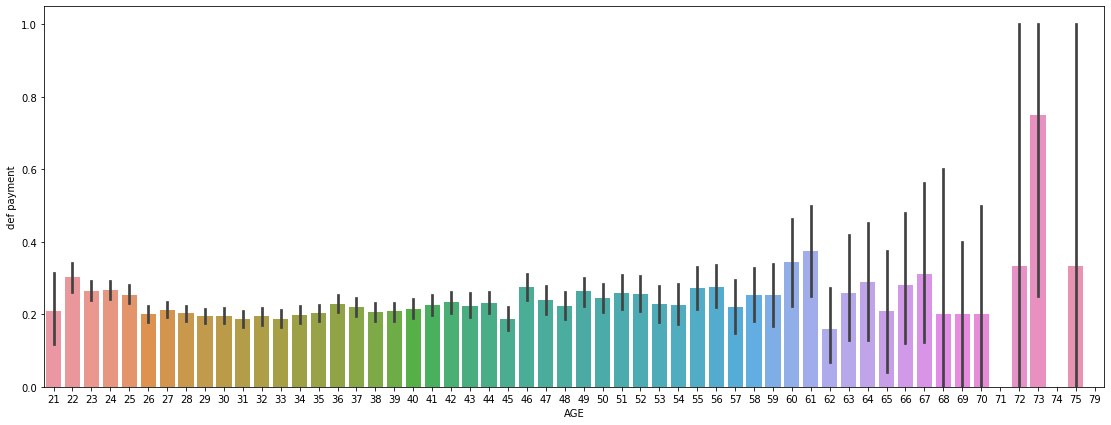

In [ ]:
#plotting the bar plot to vizualize the data distribution related to the default_payment_next_month
plt.figure(figsize=(19,7))
sns.barplot(x = 'AGE', y = 'def payment', data = credit_df)

plt.show()

##**Multivariate Analysis**

Text(0.5, 1.0, 'Corration values for feaures')

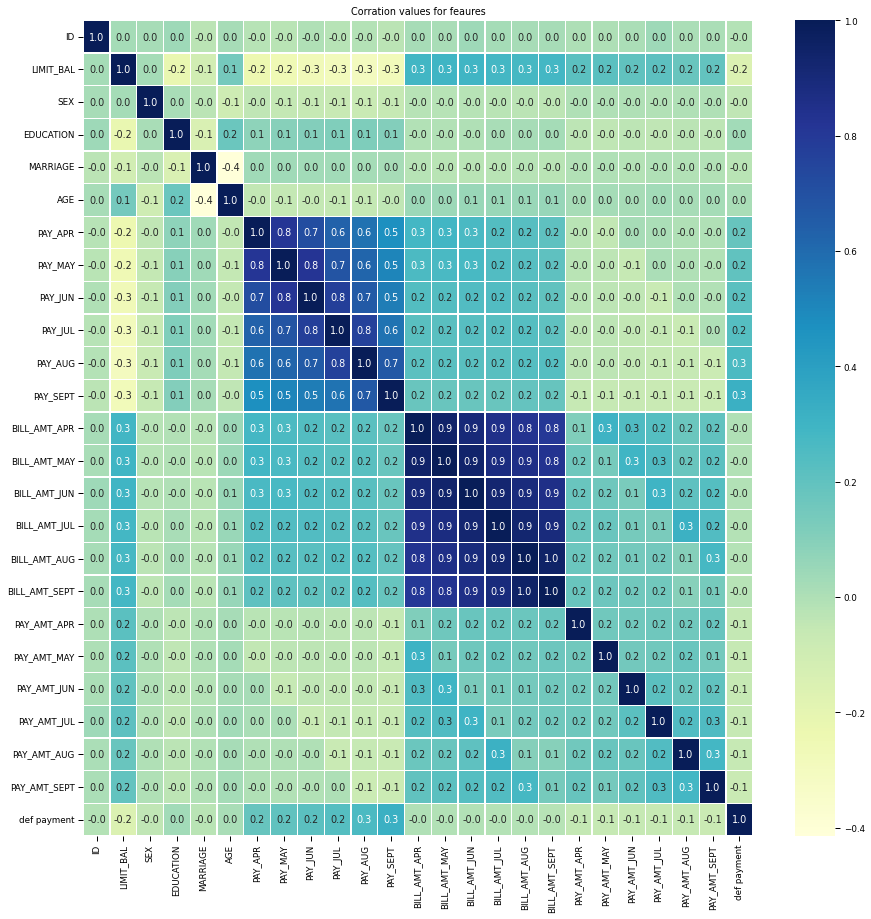

In [ ]:
corr_df=credit_df
correlation=corr_df.corr()
f = plt.figure(figsize= (15,15))
sns.set_context("paper", font_scale=1.)
sns.heatmap(correlation,  annot=True,  linewidths=.3, fmt= '.1f',cmap="YlGnBu")
plt.title("Corration values for feaures")

#SMOTE

* ***SMOTE (Synthetic Minority Oversampling Technique) – Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem. 
It aims to balance class distribution by randomly increasing minority class examples by replicating them.***

In [ ]:
#import the module 
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(credit_df.iloc[:,0:-1], credit_df['def payment'])

In [ ]:
columns = list(credit_df.columns)

In [ ]:
columns.pop()

'def payment'

In [ ]:
credit_df_sampled = pd.DataFrame(x_smote, columns=columns)

In [ ]:
credit_df_sampled['def payment'] = y_smote

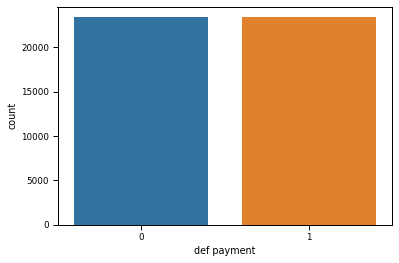

In [ ]:
#plot the count plot after smote
sns.countplot('def payment', data = credit_df_sampled)

* ***Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when the minority class has a negligible or very lesser recall.***

#**Feauture Engineering**

In [ ]:
#Replacing 0,5,and 6 to 4 in EDUCATION column
credit_df.replace({'EDUCATION': {0 : 4 ,5 : 4 ,6 : 4}}, inplace=True)

In [ ]:
#Replacing 0 in marriage to 3
credit_df.replace({'MARRIAGE': {0 : 3}}, inplace=True)

In [ ]:
#Replacing non specified values in problem statement to -1(pay duly) in payment columns.
credit_df.replace({'PAY_APR': {-2 : -1 , 0 : -1},'PAY_APR': {-2 : -1 , 0 : -1},'PAY_APR': {-2 : -1 , 0 : -1},
                  'PAY_MAY': {-2 : -1 , 0 : -1},'PAY_JUN': {-2 : -1 , 0 : -1},'PAY_JUL': {-2 : -1 , 0 : -1},
                  'PAY_AUG': {-2 : -1 , 0 : -1},'PAY_SEPT': {-2 : -1 , 0 : -1}},inplace=True)

In [ ]:
#save a copy file in other variable
credit_copy=credit_df_sampled.copy()

In [ ]:
credit_copy.head(5)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_APR,PAY_MAY,PAY_JUN,PAY_JUL,...,BILL_AMT_JUL,BILL_AMT_AUG,BILL_AMT_SEPT,PAY_AMT_APR,PAY_AMT_MAY,PAY_AMT_JUN,PAY_AMT_JUL,PAY_AMT_AUG,PAY_AMT_SEPT,def payment
0,1,20000,2,2,1,24,-2,-2,-1,-1,...,689,3102,3913,0,0,0,0,689,0,1
1,2,120000,2,2,2,26,2,0,0,0,...,2682,1725,2682,2000,0,1000,1000,1000,0,1
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14027,29239,5000,1000,1000,1000,1500,1518,0
3,4,50000,2,2,1,37,0,0,0,0,...,49291,48233,46990,1000,1069,1100,1200,2019,2000,0
4,5,50000,1,2,1,57,0,0,0,-1,...,35835,5670,8617,679,689,9000,10000,36681,2000,0


## **One Hot Encoding**

* ***One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.***
* ***here we perform one hot encoding on 'EDUCATION','MARRIAGE','PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'***

In [ ]:
#Creating dummy variables
credit_copy = pd.get_dummies(credit_copy,columns=['EDUCATION','MARRIAGE'])

In [ ]:
credit_copy= pd.get_dummies(credit_copy, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [ ]:
# LABEL ENCODING FOR SEX
credit_copy.replace({'SEX': {1 : 0 ,2 : 1}}, inplace=True)

In [ ]:
credit_copy.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_APR,BILL_AMT_MAY,BILL_AMT_JUN,BILL_AMT_JUL,BILL_AMT_AUG,BILL_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,1,24,0,0,0,689,3102,3913,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,1,26,3261,3455,3272,2682,1725,2682,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,1,34,15549,14948,14331,13559,14027,29239,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,1,37,29547,28959,28314,49291,48233,46990,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,0,57,19131,19146,20940,35835,5670,8617,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
credit_copy.shape

(46728, 88)

In [ ]:
credit_copy.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_APR', 'BILL_AMT_MAY',
       'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEPT',
       'PAY_AMT_APR', 'PAY_AMT_MAY', 'PAY_AMT_JUN', 'PAY_AMT_JUL',
       'PAY_AMT_AUG', 'PAY_AMT_SEPT', 'def payment', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2',
       'PAY_SEPT_3', 'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7',
       'PAY_SEPT_8', 'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2',
       'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7',
       'PAY_AUG_8', 'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2',
       'PAY_JUL_3', 'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7',
       'PAY_JUL_8', 'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2',
       'PAY_JUN_3', 'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6

#**Data Transformation**

Now, let's move on to the predictive models. First, we will make a copy of our dataset and separate the features from the target variable.

In [ ]:
#Creating X and y for train_test split
X=credit_copy.drop(['def payment'],axis=1)
y=credit_copy['def payment']

In [ ]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#**Model Selection**

## **Performance Metrics**
* **Precision** is a good metric to use when the costs of **false positive(FP)** is high.

  **Precision = TP / (TP + FP)**

* **Recall** is a good metric to use when the cost associated with **false negative(FN)** is high.

  **Recall = TP / (TP + FN)**

* **F1-score** is a weighted average of **precision** and **recall**. Thus, it considers **FP** and **FN.** This metric is very useful when we have uneven class distribution, as it seeks a balance between **precision** and **recall.**

  **F1-score = 2 * (precision * recall) / (precision + recall)**

## **Note**
* In this classification problem there is a high cost for the bank when a default credit card is predicted as non-default, since no actions can be taken. Thus, we will give **recall** more importance .

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
#Now we will split the data into train and test sets.
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
models=[]
lr_model=LogisticRegression()
models.append(lr_model)
DF_model=DecisionTreeClassifier()
models.append(DF_model)
RF_model=RandomForestClassifier()
models.append(RF_model)
xgb_model=XGBClassifier()
models.append(xgb_model)




In [ ]:
models_list=['Logistic Regression','DecisionTreeClassifier','RandomForestClassifier',"XGB Classifier"]

In [ ]:
results=[]
for model in models:
    model.fit(x_train, y_train)
    y_pred_train= model.predict(x_train)
    y_pred= model.predict(x_test)
    train_accuracy=accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc=roc_auc_score(y_test, y_pred)
    train_accuracy=accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append([model, train_accuracy,test_accuracy,prec,rec, f1,roc])

In [ ]:
performance_df=pd.DataFrame(results)
performance_df.columns = ['Model', 'Train Accuracy','Test Accuracy', 'Precision', 'Recall', 'F1 Score','ROC AUC score']

In [ ]:
performance_df['Model']=models_list

In [ ]:
performance_df

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC score
0,Logistic Regression,0.753768,0.750909,0.789361,0.684128,0.732987,0.750876
1,DecisionTreeClassifier,1.000000,0.739710,0.732318,0.755210,0.743588,0.739718
2,RandomForestClassifier,1.000000,0.839789,0.860061,0.811447,0.835047,0.839775
3,XGB Classifier,0.774619,0.769955,0.809563,0.705681,0.754061,0.769923


In [ ]:
#Creating a function for model evaluation
def evaluation(model,y_test,y_pred_test):
  test_accuracy = accuracy_score(y_test,y_pred_test)
  test_precision_score = precision_score(y_test,y_pred_test)
  test_recall_score = recall_score(y_test,y_pred_test)
  test_f1_score = f1_score(y_test,y_pred_test)
  test_roc_score = roc_auc_score(y_test,y_pred_test)
  return pd.DataFrame({'Model Name': model,'Accuracy Score': test_accuracy, 'Precision Score': test_precision_score,'Recall Score': test_recall_score,'f1 score': test_f1_score,'roc_auc_score': test_roc_score}, index=[0])

 

In [ ]:
#Creating a function for Confusion matrix
def Confusion_Matrix(y_train,y_pred_train):
  cm_rf = confusion_matrix(y_train,y_pred_train)
  labels = ['Not Defaulter', 'Defaulter']
  ax= plt.subplot()
  sns.heatmap(cm_rf, annot=True, ax = ax)

  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  plt.show()

In [ ]:
#Function for roc_auc_curve
def roc_auc_curve(y_test,  y_pred_proba):
  
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()

In [ ]:
pip install colorama

In [ ]:
#KS table
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    #from colorama import Fore
    #print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [ ]:
def kstable(prob,test):
  data_ks=pd.DataFrame(prob)
  data_ks['dep']=y_test
  data_ks.columns=['one','prob','dep']
  del data_ks['one']
  return ks(data=data_ks,target="dep", prob="prob")

#Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=2)

In [ ]:
#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100] }

In [ ]:
#fit the parameter 
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'f1', n_jobs = -1, verbose = 3, cv = skf)
grid_lr_clf.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=3)

In [ ]:
best_clf= grid_lr_clf.best_estimator_
best_clf

LogisticRegression(C=10)

In [ ]:
grid_lr_clf.best_params_

{'C': 10, 'penalty': 'l2'}

In [ ]:
grid_lr_clf.best_score_

0.7355315825091157

In [ ]:
# Get the predicted classes
train_class_preds_lr = best_clf.predict(x_train)
test_class_preds_lr = best_clf.predict(x_test)

In [ ]:
# Predicted Probability
train_pred_proba_lr= best_clf.predict_proba(x_train)[::,1]
test_pred_proba_lr = best_clf.predict_proba(x_test)[::,1]

## Model Evaluation

In [ ]:
lr_metrics=evaluation('Logistic Regression',y_test,test_class_preds_lr)
lr_metrics

,Model Name,Accuracy Score,Precision Score,Recall Score,f1 score,roc_auc_score
0,Logistic Regression,0.750909,0.789361,0.684128,0.732987,0.750876


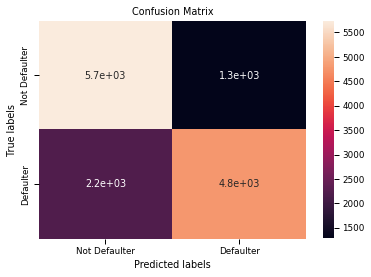

In [ ]:
Confusion_Matrix(y_test,test_class_preds_lr)

In [ ]:
print(classification_report(y_test, test_class_preds_lr))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77      7013
           1       0.79      0.68      0.73      7006

    accuracy                           0.75     14019
   macro avg       0.76      0.75      0.75     14019
weighted avg       0.76      0.75      0.75     14019



**An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:**

* True Positive Rate

* False Positive Rate

**AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve** 

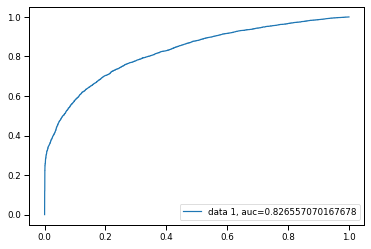

In [ ]:
roc_auc_curve(y_test,test_pred_proba_lr )

In [ ]:
prob1=best_clf.predict_proba(x_test)

In [ ]:

kstable_lr=kstable(prob1,y_test)

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.997404  1.000000    93.0      356.0      9.91%        10.76%   
2       0.806850  0.997336    92.0      342.0      9.81%        10.33%   
3       0.648351  0.806830    86.0      315.0      9.17%         9.52%   
4       0.543186  0.648271    95.0      337.0     10.13%        10.18%   
5       0.443266  0.542822    81.0      347.0      8.64%        10.48%   
6       0.374534  0.443200   104.0      331.0     11.09%        10.00%   
7       0.299577  0.374526   103.0      325.0     10.98%         9.82%   
8       0.231533  0.299365    86.0      328.0      9.17%         9.91%   
9       0.160775  0.231516   110.0      304.0     11.73%         9.18%   
10      0.000017  0.160710    88.0      325.0      9.38%         9.82%   

       cum_eventrate cum_noneventrate   KS  
Decile                                      
1              9.91% 

In [ ]:
pip install scikit-plot;

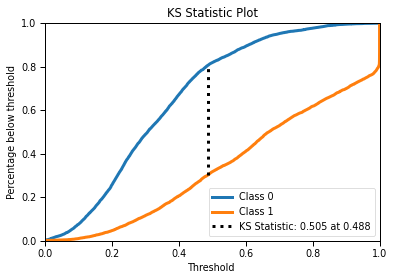

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_ks_statistic( y_test,prob1)

#Decision Tree Classifier

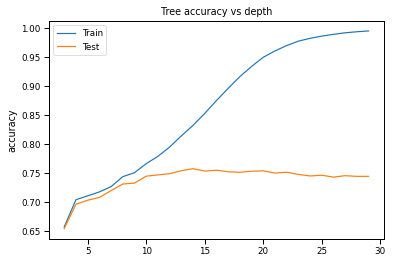

In [ ]:
depth_list=np.arange(3,30)
train,test=[],[]
for depth in depth_list:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(x_train, y_train)
    prediction = tree.predict(x_test)
    train_pred = tree.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, prediction)
    train.append(train_acc)
    test.append(test_acc)
performance = pd.DataFrame({'max_depth':depth_list,'Train_acc':train,'Test_acc':test})
fig, ax = plt.subplots()
x_axis = depth_list
ax.plot(x_axis, performance['Train_acc'], label='Train')
ax.plot(x_axis, performance['Test_acc'], label='Test')
ax.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs depth')
plt.show()

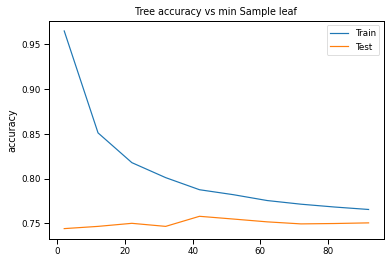

In [ ]:
sam_list = np.arange(2,100,10)
train2,test2=[],[]
for sample in sam_list:
    tree = DecisionTreeClassifier(min_samples_leaf=sample)
    tree.fit(x_train, y_train)
    prediction = tree.predict(x_test)
    train_pred = tree.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, prediction)
    train2.append(train_acc)
    test2.append(test_acc)
performance = pd.DataFrame({'sam_list':sam_list,'Train_acc':train2,'Test_acc':test2})
fig, ax = plt.subplots()
x_axis = sam_list
ax.plot(x_axis, performance['Train_acc'], label='Train')
ax.plot(x_axis, performance['Test_acc'], label='Test')
ax.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs min Sample leaf')
plt.show()

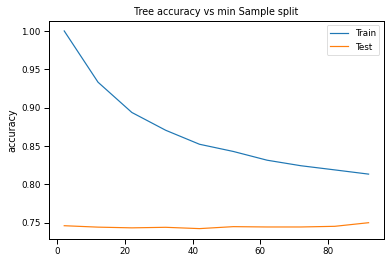

In [ ]:
sam_list = np.arange(2,100,10)
train3,test3=[],[]
for sample in sam_list:
    tree = DecisionTreeClassifier(min_samples_split=sample)
    tree.fit(x_train, y_train)
    prediction = tree.predict(x_test)
    train_pred = tree.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, prediction)
    train3.append(train_acc)
    test3.append(test_acc)
performance3= pd.DataFrame({'sam_list_split':sam_list,'Train_acc':train3,'Test_acc':test3})
fig, ax = plt.subplots()
x_axis = sam_list
ax.plot(x_axis, performance3['Train_acc'], label='Train')
ax.plot(x_axis, performance3['Test_acc'], label='Test')
ax.legend()
plt.ylabel('accuracy')
plt.title('Tree accuracy vs min Sample split')
plt.show()

In [ ]:
param_grid_ = {'max_depth': np.arange(2,10),
              'min_samples_split' : np.arange(2,20,2),
              'min_samples_leaf' : np.arange(1,21,2)}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_, scoring = 'f1', n_jobs=-1, cv=skf)

In [ ]:
grid_tree.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
             scoring='f1')

In [ ]:
#let's see the best estimator
best_tree = grid_tree.best_estimator_
print(best_tree)

DecisionTreeClassifier(max_depth=9, min_samples_split=8)


In [ ]:
grid_tree.best_score_

0.7228940693156493

In [ ]:
# Get the predicted classes
train_class_preds_df = best_tree.predict(x_train)
test_class_preds_df = best_tree.predict(x_test)

In [ ]:
# Predicted Probability
train_pred_proba_df= best_tree.predict_proba(x_train)[::,1]
test_pred_proba_df = best_tree.predict_proba(x_test)[::,1]

##**Model Evaluation**

In [ ]:
# Get the accuracy scores
train_accuracy_df = accuracy_score(y_train,train_class_preds_df)
test_accuracy_df = accuracy_score(y_test,test_class_preds_df)

print("The accuracy on train data is ", train_accuracy_df)
print("The accuracy on test data is ", test_accuracy_df)

The accuracy on train data is  0.7502827967837599
The accuracy on test data is  0.73293387545474


In [ ]:
DT_metrics=evaluation('Decision Tree Classifier',y_test,test_class_preds_df)
DT_metrics

,Model Name,Accuracy Score,Precision Score,Recall Score,f1 score,roc_auc_score
0,Decision Tree Classifier,0.732934,0.755243,0.688838,0.720514,0.732912


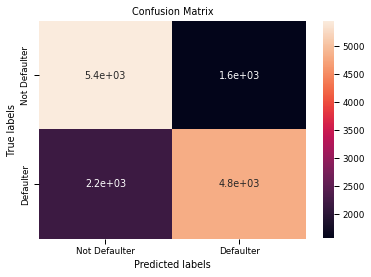

In [ ]:
# Get the confusion matrix for test
Confusion_Matrix(y_test,test_class_preds_df)

In [ ]:
print(classification_report(y_test, test_class_preds_df))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      7013
           1       0.76      0.69      0.72      7006

    accuracy                           0.73     14019
   macro avg       0.73      0.73      0.73     14019
weighted avg       0.73      0.73      0.73     14019



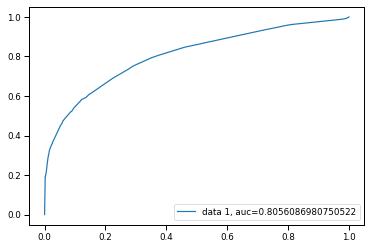

In [ ]:
roc_auc_curve(y_test,test_pred_proba_df )

In [ ]:
prob=best_tree.predict_proba(x_test)

In [ ]:

kstable(prob,y_test)

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.965517  1.000000    81.0      327.0      8.64%         9.88%   
2       0.790323  0.955017    94.0      345.0     10.02%        10.42%   
3       0.692308  0.789116    75.0      283.0      8.00%         8.55%   
4       0.518519  0.688679   102.0      325.0     10.87%         9.82%   
5       0.500000  0.517540    54.0      231.0      5.76%         6.98%   
6       0.333333  0.487673   136.0      482.0     14.50%        14.56%   
7       0.264151  0.327273    61.0      201.0      6.50%         6.07%   
8       0.252816  0.252816   100.0      331.0     10.66%        10.00%   
9       0.142857  0.232646   124.0      439.0     13.22%        13.26%   
10      0.000000  0.135629   111.0      346.0     11.83%        10.45%   

       cum_eventrate cum_noneventrate   KS  
Decile                                      
1              8.64% 

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.965517,1.000000,81.0,327.0,8.64%,9.88%,8.64%,9.88%,-1.2
2,0.790323,0.955017,94.0,345.0,10.02%,10.42%,18.66%,20.30%,-1.6
3,0.692308,0.789116,75.0,283.0,8.00%,8.55%,26.65%,28.85%,-2.2
4,0.518519,0.688679,102.0,325.0,10.87%,9.82%,37.53%,38.67%,-1.1
5,0.500000,0.517540,54.0,231.0,5.76%,6.98%,43.28%,45.65%,-2.4
6,0.333333,0.487673,136.0,482.0,14.50%,14.56%,57.78%,60.21%,-2.4
7,0.264151,0.327273,61.0,201.0,6.50%,6.07%,64.29%,66.28%,-2.0
8,0.252816,0.252816,100.0,331.0,10.66%,10.00%,74.95%,76.28%,-1.3
9,0.142857,0.232646,124.0,439.0,13.22%,13.26%,88.17%,89.55%,-1.4


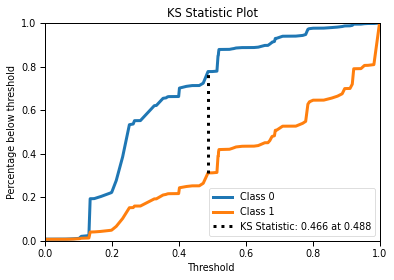

In [ ]:

skplt.metrics.plot_ks_statistic(y_test, prob)

# **RandomForest Classifier**

**A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestClassifier

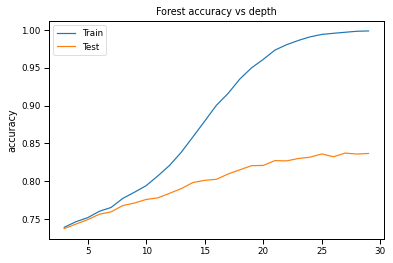

In [ ]:
depth_list=np.arange(3,30)
train,test=[],[]
for depth in depth_list:
    tree = RandomForestClassifier(max_depth=depth)
    tree.fit(x_train, y_train)
    prediction = tree.predict(x_test)
    train_pred = tree.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, prediction)
    train.append(train_acc)
    test.append(test_acc)
performance = pd.DataFrame({'max_depth':depth_list,'Train_acc':train,'Test_acc':test})
fig, ax = plt.subplots()
x_axis = depth_list
ax.plot(x_axis, performance['Train_acc'], label='Train')
ax.plot(x_axis, performance['Test_acc'], label='Test')
ax.legend()
plt.ylabel('accuracy')
plt.title('Forest accuracy vs depth')
plt.show()

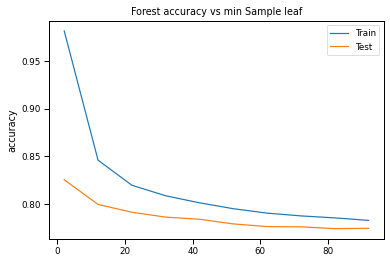

In [ ]:
sam_list = np.arange(2,100,10)
train2,test2=[],[]
for sample in sam_list:
    tree = RandomForestClassifier(min_samples_leaf=sample)
    tree.fit(x_train, y_train)
    prediction = tree.predict(x_test)
    train_pred = tree.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, prediction)
    train2.append(train_acc)
    test2.append(test_acc)
performance = pd.DataFrame({'sam_list':sam_list,'Train_acc':train2,'Test_acc':test2})
fig, ax = plt.subplots()
x_axis = sam_list
ax.plot(x_axis, performance['Train_acc'], label='Train')
ax.plot(x_axis, performance['Test_acc'], label='Test')
ax.legend()
plt.ylabel('accuracy')
plt.title('Forest accuracy vs min Sample leaf')
plt.show()

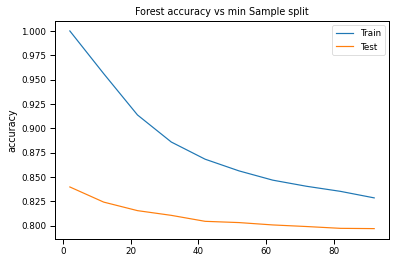

In [ ]:
sam_list = np.arange(2,100,10)
train3,test3=[],[]
for sample in sam_list:
    tree = RandomForestClassifier(min_samples_split=sample)
    tree.fit(x_train, y_train)
    prediction = tree.predict(x_test)
    train_pred = tree.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, prediction)
    train3.append(train_acc)
    test3.append(test_acc)
performance3= pd.DataFrame({'sam_list_split':sam_list,'Train_acc':train3,'Test_acc':test3})
fig, ax = plt.subplots()
x_axis = sam_list
ax.plot(x_axis, performance3['Train_acc'], label='Train')
ax.plot(x_axis, performance3['Test_acc'], label='Test')
ax.legend()
plt.ylabel('accuracy')
plt.title('Forest accuracy vs min Sample split')
plt.show()

In [ ]:
#set the parmeter
param_grid = {'n_estimators': [10,100,200], 'max_depth':np.arange(2,20,5),'min_samples_leaf':[5,10,15,20],'min_samples_split':[30,50,70,100]}

In [ ]:
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=2)

In [ ]:
#fit the parameter
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'f1', n_jobs = -1, verbose = 3, cv = skf)
grid_rf_clf.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  7, 12, 17]),
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [30, 50, 70, 100],
                         'n_estimators': [10, 100, 200]},
             scoring='f1', verbose=3)

In [ ]:
grid_rf_clf.best_score_

0.7839652983122438

In [ ]:
grid_rf_clf.best_params_

{'max_depth': 17,
 'min_samples_leaf': 5,
 'min_samples_split': 30,
 'n_estimators': 200}

In [ ]:
optimal_rf_clf = grid_rf_clf.best_estimator_
optimal_rf_clf

RandomForestClassifier(max_depth=17, min_samples_leaf=5, min_samples_split=30,
                       n_estimators=200)

In [ ]:
# Get the predicted classes
train_class_preds_rf = optimal_rf_clf.predict(x_train)
test_class_preds_rf = optimal_rf_clf.predict(x_test)

In [ ]:
# Predicted Probability
train_pred_proba_rf= optimal_rf_clf.predict_proba(x_train)[::,1]
test_pred_proba_rf = optimal_rf_clf.predict_proba(x_test)[::,1]

## Model Evaluation

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(y_train,train_class_preds_rf)
test_accuracy_rf = accuracy_score(y_test,test_class_preds_rf)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.8417866642208567
The accuracy on test data is  0.7972037948498466


In [ ]:
RF_metrics=evaluation('Random forest classifier',y_test , test_class_preds_rf)
RF_metrics

,Model Name,Accuracy Score,Precision Score,Recall Score,f1 score,roc_auc_score
0,Random forest classifier,0.797204,0.827331,0.750928,0.78728,0.797181


In [ ]:
print(classification_report(y_test, test_class_preds_rf))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81      7013
           1       0.83      0.75      0.79      7006

    accuracy                           0.80     14019
   macro avg       0.80      0.80      0.80     14019
weighted avg       0.80      0.80      0.80     14019



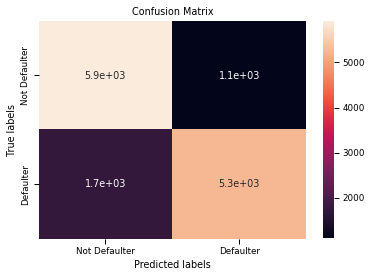

In [ ]:
# Get the confusion matrix for test
Confusion_Matrix(y_test,test_class_preds_rf)

**An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:**

* True Positive Rate

* False Positive Rate

**AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve**

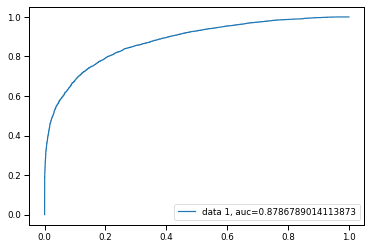

In [ ]:
roc_auc_curve(y_test,test_pred_proba_rf )

In [ ]:
prob=optimal_rf_clf.predict_proba(x_test)

In [ ]:

kstable(prob,y_test)

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.901171  1.000000    96.0      335.0     10.23%        10.12%   
2       0.786025  0.900881    85.0      361.0      9.06%        10.91%   
3       0.677547  0.785918    78.0      332.0      8.32%        10.03%   
4       0.552733  0.677541    85.0      326.0      9.06%         9.85%   
5       0.455795  0.552683    94.0      329.0     10.02%         9.94%   
6       0.372260  0.455768   102.0      314.0     10.87%         9.49%   
7       0.302011  0.372185   108.0      337.0     11.51%        10.18%   
8       0.241698  0.302009    95.0      339.0     10.13%        10.24%   
9       0.182260  0.241603   102.0      327.0     10.87%         9.88%   
10      0.046189  0.182063    93.0      310.0      9.91%         9.37%   

       cum_eventrate cum_noneventrate   KS  
Decile                                      
1             10.23% 

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.901171,1.000000,96.0,335.0,10.23%,10.12%,10.23%,10.12%,0.1
2,0.786025,0.900881,85.0,361.0,9.06%,10.91%,19.30%,21.03%,-1.7
3,0.677547,0.785918,78.0,332.0,8.32%,10.03%,27.61%,31.06%,-3.4
4,0.552733,0.677541,85.0,326.0,9.06%,9.85%,36.67%,40.91%,-4.2
5,0.455795,0.552683,94.0,329.0,10.02%,9.94%,46.70%,50.85%,-4.2
6,0.372260,0.455768,102.0,314.0,10.87%,9.49%,57.57%,60.33%,-2.8
7,0.302011,0.372185,108.0,337.0,11.51%,10.18%,69.08%,70.51%,-1.4
8,0.241698,0.302009,95.0,339.0,10.13%,10.24%,79.21%,80.76%,-1.5
9,0.182260,0.241603,102.0,327.0,10.87%,9.88%,90.09%,90.63%,-0.5


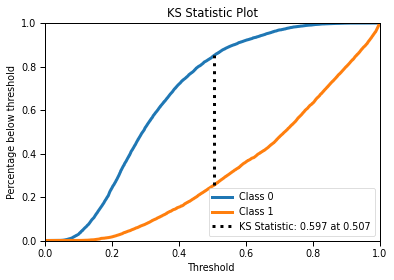

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_ks_statistic(y_test, prob)

# **XGBoost Classifier** 

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve

In [ ]:
xgb = XGBClassifier(n_jobs = -1)
xgb

XGBClassifier(n_jobs=-1)

In [ ]:
xgb.fit(x_train, y_train)
prediction = xgb.predict(x_test)
print("Accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100,3)))

Accuracy: 76.996%


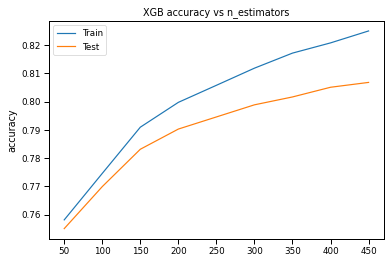

In [ ]:
tree_list = np.arange(50, 500, 50)
train = []
test = []

for tree in tree_list:
    xgb = XGBClassifier(n_estimators=tree, n_jobs = -1)
    xgb.fit(x_train, y_train)
    prediction = xgb.predict(x_test)
    trainpred = xgb.predict(x_train)
    train_acc = accuracy_score(y_train, trainpred)
    test_acc = accuracy_score(y_test, prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'n_estimators':tree_list,'Train_acc':train,'Test_acc':test})

fig, ax = plt.subplots()
x_axis = tree_list
ax.plot(x_axis, performance['Train_acc'], label='Train')
ax.plot(x_axis, performance['Test_acc'], label='Test')
ax.legend()
plt.ylabel('accuracy')
plt.title('XGB accuracy vs n_estimators')
plt.show()


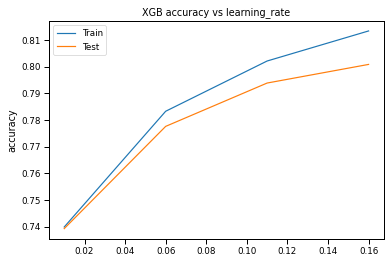

In [ ]:
learn_list = np.arange(0.01, 0.2, 0.05) 
train = []
test = []

for tree in learn_list:
    xgb = XGBClassifier(n_estimators=200, learning_rate=tree, n_jobs = -1, random_state=42)
    xgb.fit(x_train, y_train)
    prediction = xgb.predict(x_test)
    trainpred = xgb.predict(x_train)
    train_acc = accuracy_score(y_train, trainpred)
    test_acc = accuracy_score(y_test, prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'learning_rate':learn_list,'Train_acc':train,'Test_acc':test})

fig, ax = plt.subplots()
x_axis = learn_list
ax.plot(x_axis, performance['Train_acc'], label='Train')
ax.plot(x_axis, performance['Test_acc'], label='Test')
ax.legend()
plt.ylabel('accuracy')
plt.title('XGB accuracy vs learning_rate')
plt.show()

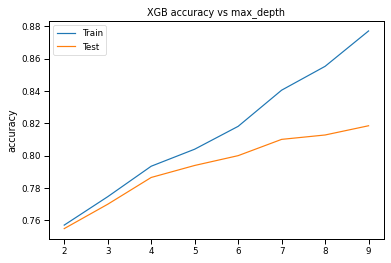

In [ ]:
tree_list = np.arange(2, 10) 
train = []
test = []

for tree in tree_list:
    xgb = XGBClassifier(max_depth=tree, n_jobs = -1, random_state=42)
    xgb.fit(x_train, y_train)
    prediction = xgb.predict(x_test)
    trainpred = xgb.predict(x_train)
    train_acc = accuracy_score(y_train, trainpred)
    test_acc = accuracy_score(y_test, prediction)
    train.append(train_acc)
    test.append(test_acc)
    
performance = pd.DataFrame({'max_depth':tree_list,'Train_acc':train,'Test_acc':test})

fig, ax = plt.subplots()
x_axis = tree_list
ax.plot(x_axis, performance['Train_acc'], label='Train')
ax.plot(x_axis, performance['Test_acc'], label='Test')
ax.legend()
plt.ylabel('accuracy')
plt.title('XGB accuracy vs max_depth')
plt.show()

**XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework.**

**The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.fit() function.**

## **Hyperparameter Tuning**

* **Hyperparameters are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.**
* **We can leverage the maximum power of XGBoost by tuning its hyperparameters**

In [ ]:
param_test1 = {
 'max_depth':np.arange(3,10,2),
 'learning_rate':np.arange(0.06,0.1,1)}

from sklearn.model_selection import GridSearchCV


In [ ]:
xgb_tuned = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, max_delta_step=0,
       min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1), 
 param_grid = param_test1, scoring='f1',n_jobs=-1, cv=skf, verbose = 2)

In [ ]:
xgb_tuned.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2, shuffle=True),
             estimator=XGBClassifier(n_estimators=150, n_jobs=-1, silent=True),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.06]),
                         'max_depth': array([3, 5, 7, 9])},
             scoring='f1', verbose=2)

In [ ]:
xgb_tuned.best_score_

0.8032909082478558

In [ ]:
optimal_xgb = xgb_tuned.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds_xgb = optimal_xgb.predict(x_train)
test_class_preds_xgb = optimal_xgb.predict(x_test)

In [ ]:
# Predicted Probability
train_pred_proba_xgb= optimal_xgb.predict_proba(x_train)[::,1]
test_pred_proba_xgb = optimal_xgb.predict_proba(x_test)[::,1]

##**Model Evaluation**

In [ ]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(y_train,train_class_preds_xgb)
test_accuracy_xgb_tuned = accuracy_score(y_test,test_class_preds_xgb)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.8688128649607142
The accuracy on test data is  0.8182466652400314


In [ ]:
xgb_metrics=evaluation('XGB classifier',y_test,test_class_preds_xgb)
xgb_metrics

,Model Name,Accuracy Score,Precision Score,Recall Score,f1 score,roc_auc_score
0,XGB classifier,0.818247,0.851577,0.770625,0.809081,0.818223


In [ ]:
print(classification_report(y_test, test_class_preds_xgb))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      7013
           1       0.85      0.77      0.81      7006

    accuracy                           0.82     14019
   macro avg       0.82      0.82      0.82     14019
weighted avg       0.82      0.82      0.82     14019



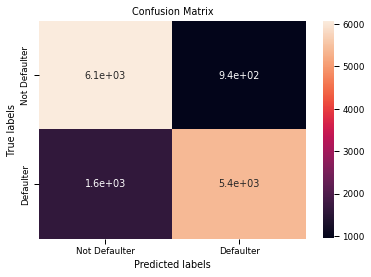

In [ ]:
# Get the confusion matrix for test
Confusion_Matrix(y_test,test_class_preds_xgb)

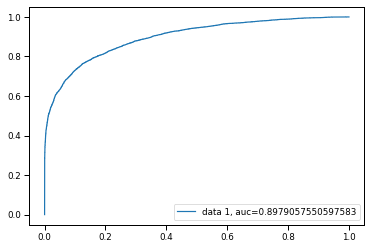

In [ ]:
roc_auc_curve(y_test,test_pred_proba_xgb )

In [ ]:
prob=optimal_xgb.predict_proba(x_test)
kstable_lr=kstable(prob,y_test)

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.993099  0.999898    94.0      345.0     10.02%        10.42%   
2       0.893016  0.993092    78.0      350.0      8.32%        10.57%   
3       0.742409  0.892916    75.0      347.0      8.00%        10.48%   
4       0.576799  0.742329    98.0      316.0     10.45%         9.55%   
5       0.435049  0.576774   106.0      298.0     11.30%         9.00%   
6       0.326582  0.434665   109.0      345.0     11.62%        10.42%   
7       0.241002  0.326494    86.0      348.0      9.17%        10.51%   
8       0.173926  0.240997    98.0      325.0     10.45%         9.82%   
9       0.110941  0.173825   101.0      312.0     10.77%         9.43%   
10      0.013103  0.110839    93.0      324.0      9.91%         9.79%   

       cum_eventrate cum_noneventrate   KS  
Decile                                      
1             10.02% 

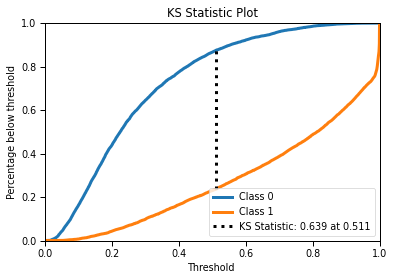

In [ ]:

skplt.metrics.plot_ks_statistic(y_test, prob)

# **Evaluating the models**

In [ ]:
recall_score

<function sklearn.metrics._classification.recall_score>

In [ ]:
model_metrics_df = pd.concat([lr_metrics,DT_metrics,RF_metrics,xgb_metrics])

In [ ]:
model_metrics_df

,Model Name,Accuracy Score,Precision Score,Recall Score,f1 score,roc_auc_score
0,Logistic Regression,0.750909,0.789361,0.684128,0.732987,0.750876
0,Decision Tree Classifier,0.732934,0.755243,0.688838,0.720514,0.732912
0,Random forest classifier,0.797204,0.827331,0.750928,0.787280,0.797181
0,XGB classifier,0.818247,0.851577,0.770625,0.809081,0.818223


**from the above table we can find that xgboost classifier perform best among those models**

# **Plotting ROC AUC for all the models**

In [ ]:
classifiers_proba = [(best_clf, test_pred_proba_lr), 
               (best_tree, test_pred_proba_df), 
               (optimal_rf_clf, test_pred_proba_rf),
               (optimal_xgb,test_pred_proba_xgb)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

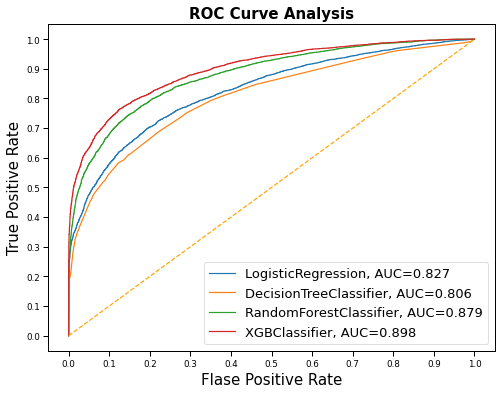

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## **Feature Importance** :

In [ ]:
feature=credit_copy
feature.drop(['def payment'],axis=1,inplace=True)

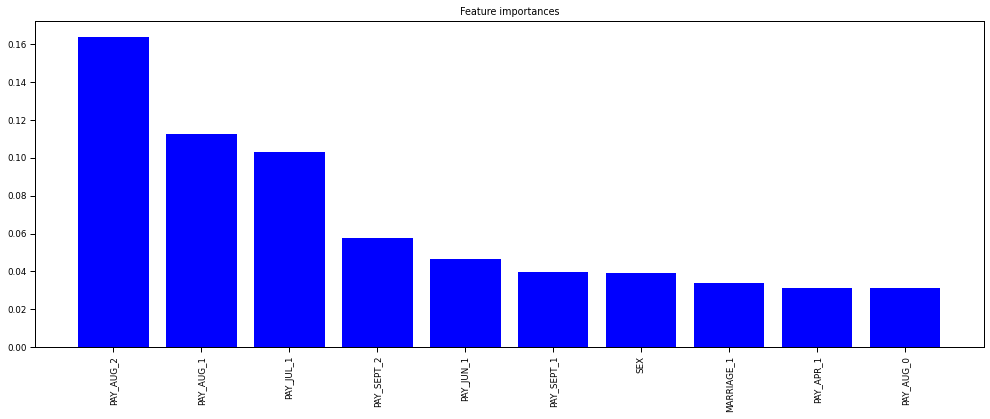

In [ ]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = feature.columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 90)
plt.show()